# Project Objectives:
1. **Analyse Usage and Demand Patterns:** Examine the extensive trip data available in Co-Wheels’ booking system (TripIQ) to identify patterns in vehicle usage and demand across different locations and times.
2. **Design and Develop a Pricing Model and Tool:**
     1. Create a pricing model that incorporates fixed and variable costs, including fuel and electricity, to determine optimal hourly and daily rates for different locations and times.
     2. Develop a straightforward tool that allows Co-Wheels to input various cost factors and receive tailored pricing options based on location, demand, and seasonal variations.   
4. **Evaluate Seasonal and Temporal Variations:** Assess the impact of seasonal changes and time-of-day variations on car-sharing demand and integrate these factors into the pricing model.
5. **Assess Profitability and Utilisation Impact:** Model potential outcomes of different pricing strategies to evaluate their impact on profitability and vehicle utilisation rates in various locations.
6. **Validate pricing tool:** Test the pricing tool with real-world data to ensure its accuracy and effectiveness in optimising Co-Wheels’ pricing strategy.

# IMP:


1. Calculate Seasonality
2. Analyse - How far user booked their rides before using it?
3. Analyse - Compare travelling based on:
    1. booking_billed_duration.
    2. booking_mileage.
4. Analyse - Demand Elasticity Calculation (This involves analysing how changes in price affect the number of bookings.)
5. Analyse - Which vehicle type generated more revenue in terms of:
    1. Distance only?
    2. Time only?
    3. Total Cost?

# 1. Loading libraries and data

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats
from matplotlib.ticker import FuncFormatter

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

# Ignore all warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Data location
DATA_PATH = "/content/drive/MyDrive/MSc Dissertation/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1. Load data

In [2]:
df = pd.read_csv(DATA_PATH + 'preprocessed_dataset.csv')
new_order = ['vehicle_description', 'vehicle_registration',	'location',	'booking_id', 'booking_actual_start', 'booking_actual_end',	'booking_actual_duration',
             'booking_billed_start', 'booking_billed_start_hour', 'booking_billed_start_dayofweek', 'booking_billed_start_month', 'booking_billed_start_year',
             'booking_billed_end', 'booking_billed_end_hour', 'booking_billed_end_dayofweek', 'booking_billed_end_month', 'booking_billed_end_year',
             'booking_billed_duration', 'booking_mileage', 'booking_rates_hours', 'booking_rates_24hours', 'booking_rates_overnight', 'booking_actual_cost_distance',
             'booking_actual_cost_time', 'booking_actual_cost_total', 'booking_created_at',	'booking_created_at_hour', 'booking_created_at_dayofweek',
             'booking_created_at_month', 'booking_created_at_year', 'season', 'is_holiday', 'Vehicle Type',	'Fuel Type', 'hourly_rate',	'daily_rate', 'per_mile']

df = df[new_order]

In [3]:
df.head()

,vehicle_description,vehicle_registration,location,booking_id,booking_actual_start,booking_actual_end,booking_actual_duration,booking_billed_start,booking_billed_start_hour,booking_billed_start_dayofweek,booking_billed_start_month,booking_billed_start_year,booking_billed_end,booking_billed_end_hour,booking_billed_end_dayofweek,booking_billed_end_month,booking_billed_end_year,booking_billed_duration,booking_mileage,booking_rates_hours,booking_rates_24hours,booking_rates_overnight,booking_actual_cost_distance,booking_actual_cost_time,booking_actual_cost_total,booking_created_at,booking_created_at_hour,booking_created_at_dayofweek,booking_created_at_month,booking_created_at_year,season,is_holiday,Vehicle Type,Fuel Type,hourly_rate,daily_rate,per_mile
0,RETIRED - White Toyota Aygo X-Play Nav (NL66 NKZ),NL66 NKZ,Bristol,fc59ba9c-2ce9-11ea-8efc-bfa292f04054,2020-01-01 23:06:00,2020-01-02 01:24:00,138.0,2020-01-01 23:00:00,23,2,1,2020,2020-01-02 08:00:00,8,3,1,2020,540.0,82.0,0.0,0.0,1.0,14.76,9.50,24.26,2020-01-01 22:56:00,22,2,1,2020,Winter,1,City,Petrol,4.75,33.25,0.18
1,RETIRED - Renault Zoe EV (DL68 LNK),DL68 LNK,Bristol,1cf7fae6-2ce7-11ea-a970-fbf7b3786523,2020-01-01 22:46:00,2020-01-02 02:01:00,195.0,2020-01-01 22:45:00,22,2,1,2020,2020-01-02 02:30:00,2,3,1,2020,225.0,5.0,0.0,0.0,1.0,0.00,11.00,11.00,2020-01-01 22:36:00,22,2,1,2020,Winter,1,Everyday,EV,5.50,38.50,0.18
2,White Toyota Yaris Petrol Hybrid (Automatic) -...,ND19 HWY,Newbury,591b7a98-2cd8-11ea-a341-71665a42c0e8,2020-01-01 21:29:00,2020-01-01 23:28:00,119.0,2020-01-01 21:30:00,21,2,1,2020,2020-01-01 23:30:00,23,2,1,2020,120.0,6.0,2.0,0.0,0.0,1.08,11.00,12.08,2020-01-01 20:50:00,20,2,1,2020,Winter,1,Everyday,Petrol,5.50,38.50,0.18
3,RETIRED - White Toyota Aygo X-Play (NL68 JVP),NL68 JVP,Swindon,b6177928-2c55-11ea-a2e0-e9685b57c653,2020-01-01 21:22:00,2020-01-01 21:38:00,16.0,2020-01-01 21:15:00,21,2,1,2020,2020-01-01 21:45:00,21,2,1,2020,30.0,6.0,0.5,0.0,0.0,1.08,2.38,3.46,2020-01-01 05:15:00,5,2,1,2020,Winter,1,City,Petrol,4.75,33.25,0.18
4,RETIRED - White Toyota Yaris Hybrid NJ68 JHV A...,NJ68 JHV,Horsham,9ffdc790-27ba-11ea-a36d-c540c1997f03,2020-01-01 22:02:00,2020-01-02 19:50:00,733.0,2020-01-01 20:30:00,20,2,1,2020,2020-01-02 20:30:00,20,3,1,2020,915.0,53.0,0.0,1.0,0.0,9.54,38.50,48.04,2019-12-26 08:35:00,8,3,12,2019,Winter,1,Everyday,Petrol,5.50,38.50,0.18


# 2. Exploratory Data Analysis (EDA)

In [4]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
vehicle_description,916
vehicle_registration,966
location,90
booking_id,378614
booking_actual_start,331063
booking_actual_end,337717
booking_actual_duration,734
booking_billed_start,116285
booking_billed_start_hour,24
booking_billed_start_dayofweek,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378614 entries, 0 to 378613
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   vehicle_description             378614 non-null  object 
 1   vehicle_registration            378614 non-null  object 
 2   location                        378614 non-null  object 
 3   booking_id                      378614 non-null  object 
 4   booking_actual_start            378614 non-null  object 
 5   booking_actual_end              378614 non-null  object 
 6   booking_actual_duration         378614 non-null  float64
 7   booking_billed_start            378614 non-null  object 
 8   booking_billed_start_hour       378614 non-null  int64  
 9   booking_billed_start_dayofweek  378614 non-null  int64  
 10  booking_billed_start_month      378614 non-null  int64  
 11  booking_billed_start_year       378614 non-null  int64  
 12  booking_billed_e

In [6]:
# Checking null values in the dataset
df.isnull().sum()

vehicle_description               0
vehicle_registration              0
location                          0
booking_id                        0
booking_actual_start              0
booking_actual_end                0
booking_actual_duration           0
booking_billed_start              0
booking_billed_start_hour         0
booking_billed_start_dayofweek    0
booking_billed_start_month        0
booking_billed_start_year         0
booking_billed_end                0
booking_billed_end_hour           0
booking_billed_end_dayofweek      0
booking_billed_end_month          0
booking_billed_end_year           0
booking_billed_duration           0
booking_mileage                   0
booking_rates_hours               0
booking_rates_24hours             0
booking_rates_overnight           0
booking_actual_cost_distance      0
booking_actual_cost_time          0
booking_actual_cost_total         0
booking_created_at                0
booking_created_at_hour           0
booking_created_at_dayofweek

# 3. Relationship between features

 There is a strong positive correlation between `booking_mileage` and `booking_actual_cost_distance`. This means that as the mileage of the booking increases, the cost associated with the distance also increases.

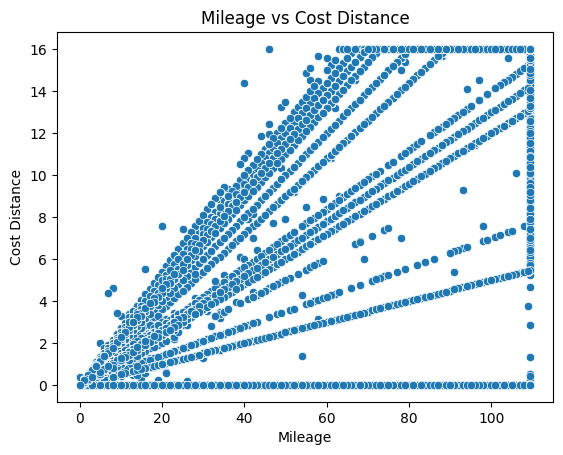

In [7]:
sns.scatterplot(x=df['booking_mileage'], y=df['booking_actual_cost_distance'])
plt.title('Mileage vs Cost Distance')
plt.xlabel('Mileage')
plt.ylabel('Cost Distance')
plt.show()

There is a clear positive correlation between `Actual Cost Time` and `Actual Cost Total`. This indicates that as the cost associated with time increases, the total cost also increases. **It is evident that Total Cost is heavily influenced by Cost Time. Therefore, it is recommended to adjust the prices for hourly_rate and daily_rate to maximize our overall revenues.**

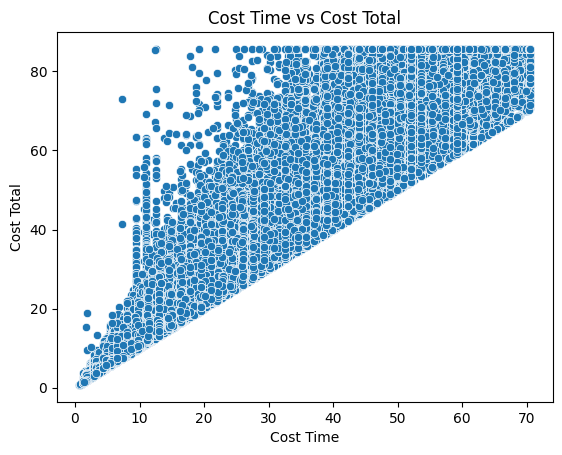

In [8]:
sns.scatterplot(x=df['booking_actual_cost_time'], y=df['booking_actual_cost_total'])
plt.title('Cost Time vs Cost Total')
plt.xlabel('Cost Time')
plt.ylabel('Cost Total')
plt.show()

There is a positive correlation between `Cost Distance` and `Cost Total`, indicating that as the distance cost increases, the total cost also tends to increase. This is expected as distance is a significant component of the total cost. The plot shows a dense distribution of data points, especially in the lower ranges of both Cost Distance and Cost Total. This suggests that most bookings have lower distance costs and total costs.

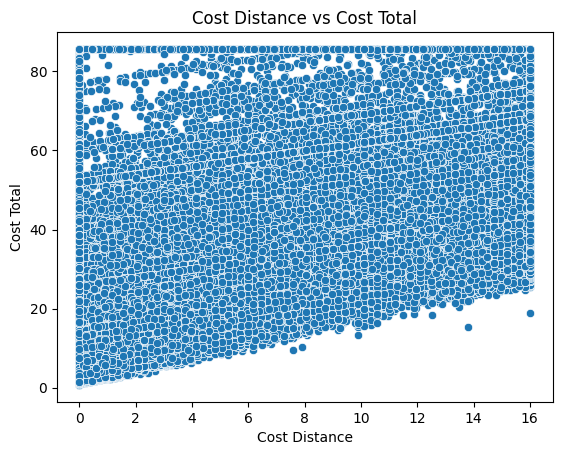

In [9]:
sns.scatterplot(x=df['booking_actual_cost_distance'], y=df['booking_actual_cost_total'])
plt.title('Cost Distance vs Cost Total')
plt.xlabel('Cost Distance')
plt.ylabel('Cost Total')
plt.show()

# 4. Analyse - Which types of Vehicle has more cars?

The bar chart provided shows the total number of bookings for each vehicle type, conveying several insights. Firstly, `Everyday` vehicles are the most popular, with the highest number of total bookings, significantly surpassing all other categories. `Family` vehicles follow as the second most popular, with a substantial number of bookings, although markedly fewer than Everyday vehicles. `City` vehicles come next, occupying a middle range of popularity with fewer bookings than Family vehicles. `Vans and 7 Seaters` have the lowest number of bookings, with 7 Seaters being the least popular among the listed categories. The chart highlights a significant drop in bookings from Everyday vehicles to Family vehicles, indicating a much higher demand for Everyday vehicles. The difference between Family and City vehicle bookings is notable but not as steep. Vans and 7 Seaters show considerably lower bookings compared to other categories, reflecting less demand. _These insights suggest that `Everyday vehicles` should be prioritized in `fleet availability and maintenance` due to their high demand. Additionally, revenues can be maximized with an improved pricing strategy for Everyday vehicles. Family and City vehicles also require adequate stocking, while Vans and 7 Seaters, despite their lower popularity, still need attention, albeit in smaller quantities. Overall, the chart underscores the distribution of bookings across different vehicle types, providing valuable information for decision-making regarding fleet composition, resource allocation and revenue management._

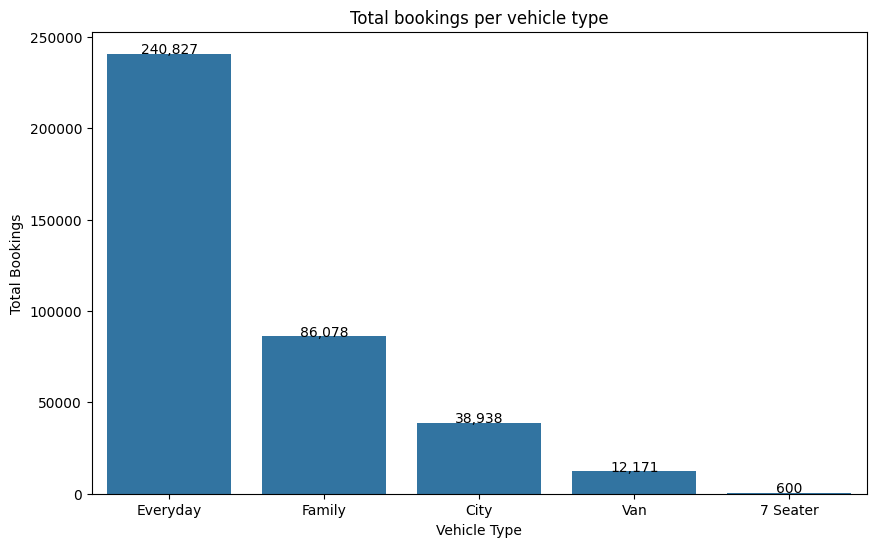

In [10]:
df_vehicle_type = df.groupby('Vehicle Type')['vehicle_registration'].count().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Vehicle Type', y='vehicle_registration', data=df_vehicle_type)

# Adding title and labels
plt.title('Total bookings per vehicle type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Bookings')

# Adding the actual values above each bar
for index, row in df_vehicle_type.iterrows():
    barplot.text(index, row['vehicle_registration'], f'{row["vehicle_registration"]:,.0f}', color='black', ha="center")

# Displaying the plot
plt.show()

# 5. Analysis - Revenues

## 5.1. How do overall revenues compare based on vehicle type?

The bar chart depicting total revenue per vehicle type provides several key insights. `Everyday vehicles` generate the highest revenue by far, with a total of £6,492,919, indicating their substantial contribution to overall earnings. `Family vehicles` follow, generating £2,920,260 of revenue, which, while significantly less than Everyday vehicles, still represents a considerable portion of the total revenue. `City vehicles` contribute £940,546, placing them in the middle range of revenue generation. `Vans`, with a total revenue of £391,175, and `7 Seaters`, with £23,185, generate the least revenue, reflecting their lower utilisation or popularity. This chart underscores the importance of **Everyday and Family vehicles in the revenue stream**, suggesting that these categories should be a focus for fleet expansion and marketing efforts. The lower revenue figures for Vans and 7 Seaters may indicate a need to either re-evaluate their pricing strategies or to promote their usage more aggressively. Overall, the chart highlights the distribution of revenue across different vehicle types, providing valuable insights for strategic decision-making in vehicle fleet management and marketing.

In [11]:
# Function to format the y-axis labels
def format_y_axis(value, tick_number):
    return f'{value:,.0f}'

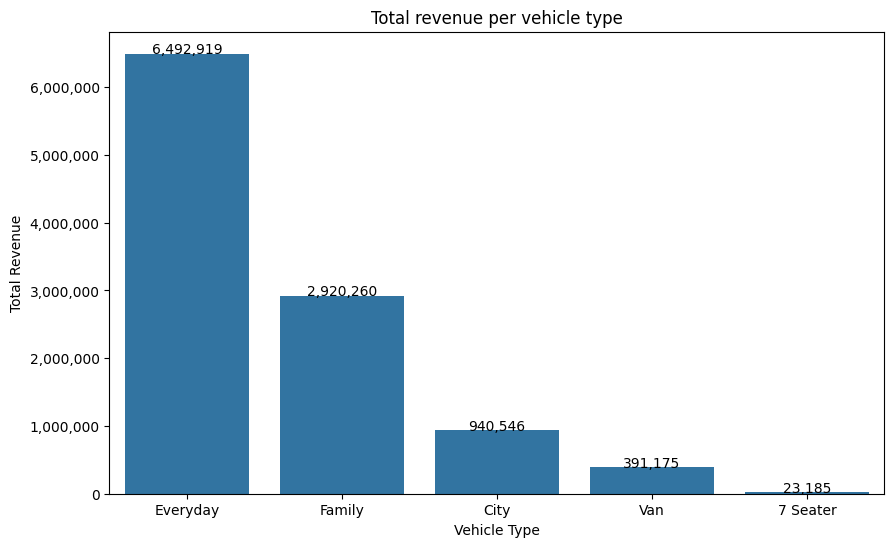

In [12]:
df_revenue_vehicle_type = df.groupby('Vehicle Type')['booking_actual_cost_total'].sum().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Vehicle Type', y='booking_actual_cost_total', data=df_revenue_vehicle_type)

# Adding title and labels
plt.title('Total revenue per vehicle type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_revenue_vehicle_type.iterrows():
    barplot.text(index, row['booking_actual_cost_total'], f'{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

# Displaying the plot
plt.show()

## 5.2. How do overall revenues compare based on location?

The treemap chart provided visualises `total revenues by location`, offering a clear representation of the revenue contribution from various locations. The largest blocks in the treemap indicate the **highest revenue-generating locations, with Glasgow, Oxford, and Bristol standing out as the top contributors**. *Glasgow is the most significant*, reflecting its substantial contribution to total revenues. These locations are key players in the overall revenue landscape, making them critical areas for ongoing investment and focus.

**Locations such as Newcastle, Dundee, Tunbridge Wells, Salford, and Harrogate** also make significant contributions, though smaller than the top three. Their relatively large blocks in the treemap show that they play an important role in overall revenue generation. These moderate contributors highlight the need for balanced attention across multiple high-performing areas to maintain and grow revenue streams.

The smaller blocks represent locations that contribute less to the total revenue, including cities like Gateshead, Swindon, Durham, and many others. Despite their smaller contributions, these locations collectively add to the overall revenue, demonstrating the value of a broad geographical spread. **The presence of numerous smaller blocks indicates that even less prominent locations play a role in the business's financial health, suggesting potential areas for targeted marketing efforts or strategic enhancements.**

In [13]:
df_revenue_location = df.groupby('location')['booking_actual_cost_total'].sum().sort_values(ascending=False).to_frame()

# Create a column location from index
df_revenue_location['location'] = df_revenue_location.index

# Creating a bar plot
plt.figure(figsize=(10, 6))
# Create a treemap
fig = px.treemap(df_revenue_location, path=['location'], values='booking_actual_cost_total', title='Total Revenues by Location')

# Show the treemap
fig.show()

<Figure size 1000x600 with 0 Axes>

## 5.3. How do overall revenues compare based on season?

The bar chart illustrating `total revenue per season` offers valuable insights into `seasonal revenue patterns`. `Spring` emerges as the highest revenue-generating season, with a **total revenue of £3,684,843**, indicating a peak period for business activities. This significant revenue highlights the importance of focusing resources and marketing efforts during Spring to maximise financial performance.

`Summer` follows as the second-highest revenue season, **generating £2,801,350.** While still substantial, the revenue is noticeably lower than in Spring, suggesting a moderate decline in business activities. This data could imply the need for targeted promotions or strategies to boost revenue during the Summer months.

**`Autumn` generates £2,652,191 in total revenue**, slightly lower than Summer. This consistent revenue stream indicates steady business performance during Autumn, requiring a balanced approach to resource allocation and customer engagement.

`Winter`, with a **total revenue of £1,629,702**, is the lowest revenue-generating season. The significant drop in revenue compared to other seasons highlights the potential challenges and reduced demand during this period. Strategies to mitigate this decline could include special offers, discounts, or new services tailored to Winter conditions.

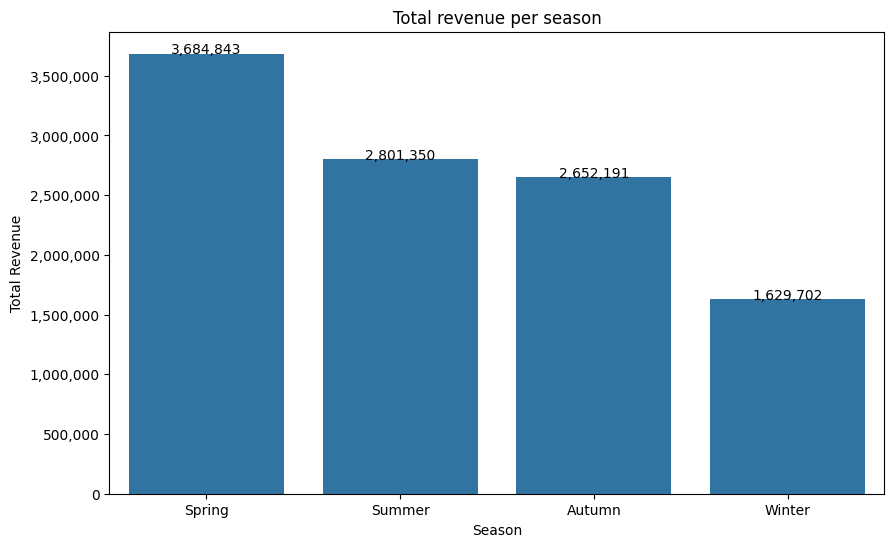

In [14]:
seasonal_revenue = df.groupby('season')['booking_actual_cost_total'].sum().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='season', y='booking_actual_cost_total', data=seasonal_revenue)

# Adding title and labels
plt.title('Total revenue per season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in seasonal_revenue.iterrows():
    barplot.text(index, row['booking_actual_cost_total'], f'{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

# Displaying the plot
plt.show()

## 5.4. How do overall revenues compare based on yearly season?

The bar chart depicting `total revenue per season from 2018 to 2024` offers an _in-depth view of the revenue trends over these years_. The stacked bars allow for a **clear comparison of how each season contributes to the annual revenue** and how these contributions have evolved.

**2018-2020**: The initial years, particularly 2018 and 2019, show relatively low revenues, with *Spring and Autumn contributing the most*. **_In 2020_**, there is a notable increase in total revenue, particularly in **Autumn (£394,549.15) and Summer (£391,510.95)**, suggesting a recovery or growth phase.

**2021**: This year marks a significant rise in revenues across all seasons, with **Spring leading (£700,072.4) and Summer (£669,256.78)** close behind. Autumn and Winter also see substantial contributions, indicating a robust overall performance.

**2022-2023**: Both years exhibit strong revenue figures with similar patterns. **Spring** remains the dominant season, with **_revenues of £928,845.02 in 2022_** and **_£936,696.69 in 2023_**. **Summer** also shows strong performance, with **_revenues over £720,000_** in both years. Autumn and Winter continue to contribute significantly but remain lower compared to Spring and Summer.

**2024**: The partial data for 2024 shows that **Spring (£527,918.1)** and **Winter (£361,777.46)** continue to be strong revenue seasons. However, the data for Autumn and Summer is not available.

<Figure size 2000x2000 with 0 Axes>

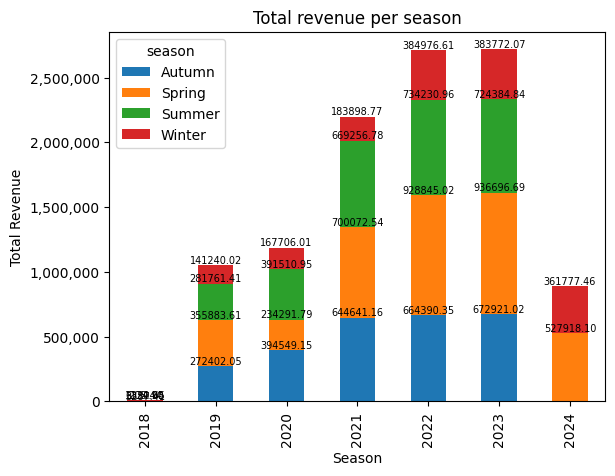

In [15]:
dff = df.copy()

# Convert 'booking_created_at_year' to string if it's numeric for better grouping
dff['booking_created_at_year'] = dff['booking_created_at_year'].astype(str)

yearly_seasonal_revenue = dff.groupby(['booking_created_at_year', 'season'])['booking_actual_cost_total'].sum().unstack()

# Creating a bar plot
plt.figure(figsize=(20, 20))
barplot = yearly_seasonal_revenue.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Total revenue per season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Loop through each patch (a rectangle in the bar chart)
for bar in barplot.patches:
    # Get the appropriate location to place the text
    # In this case, x is the horizontal center of the bar, and y is the height of the bar
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    bar_y = bar.get_y() + bar_height

    # Only add text annotations if there is enough space (height)
    if bar_height > 0:
        plt.text(bar_x, bar_y, f'{bar_height:.2f}',
                 ha='center', va='bottom', color='black', rotation=0, fontsize=7)

# Displaying the plot
plt.show()

## 5.5. How do overall revenues compare based on both location and vehicle type?

In [16]:
location_vehicle_revenue = df.groupby(['Vehicle Type', 'location'])['booking_actual_cost_total'].sum()
df_location_vehicle_revenue = pd.DataFrame(location_vehicle_revenue)
df_location_vehicle_revenue.reset_index(inplace=True)

### 5.5.1. Vehicle Type - 7 Seater

The bar chart depicting `total revenue for 7 Seater vehicles` based on `location` provides insights into the performance of this vehicle type across different locations. The data highlights three specific locations: **Aberdeen, Gateshead, and Oxford.**

_Gateshead emerges as the top performer_, generating the **highest total revenue of £9,331 for 7 Seater vehicles**. This indicates a strong demand for 7 Seaters in Gateshead, suggesting that this location may benefit from a higher availability of such vehicles or targeted marketing strategies to further capitalise on this demand.

_Oxford follows as the second-highest revenue generator_, with a **total of £7,424**. While not as high as Gateshead, the revenue from Oxford is still substantial, reflecting a significant market for 7 Seaters. This location also presents opportunities for growth, possibly through promotional efforts or service enhancements to attract more customers.

_Aberdeen_, with a **total revenue of £6,430**, ranks third among the three locations. Although it has the lowest revenue in comparison, the figures indicate a decent level of demand for 7 Seaters. This suggests that Aberdeen could benefit from strategies aimed at boosting bookings, such as targeted advertising or special offers.

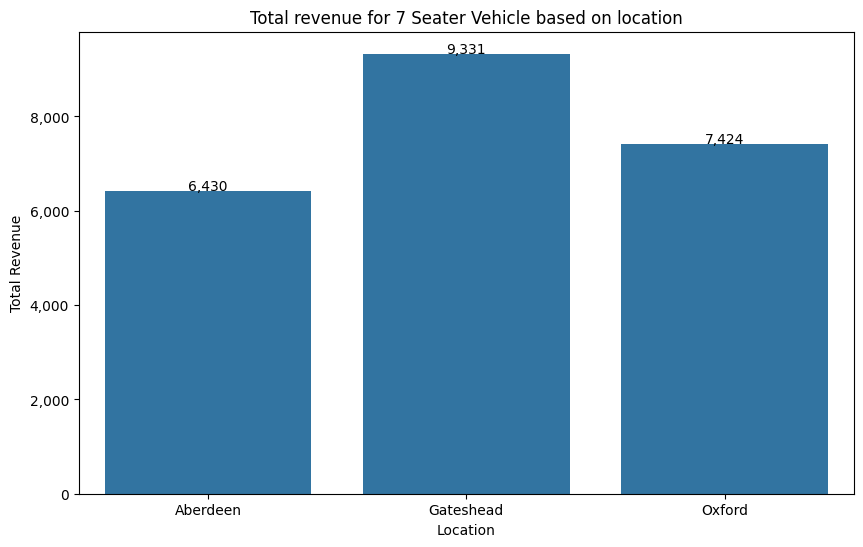

In [17]:
# Creating a bar plot - 7 Seater
plt.figure(figsize=(10, 6))
df_location_vehicle_revenue_7_seater = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == '7 Seater']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_7_seater)

# Adding title and labels
plt.title('Total revenue for 7 Seater Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_7_seater.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

# Displaying the plot
plt.show()

### 5.5.2. Vehicle Type - City

The bar chart illustrating `total revenue for City vehicles` based on location provides a detailed view of the financial performance of City vehicles across various locations. **Glasgow stands out as the highest revenue-generating location**, with a **total revenue of £208,074**, indicating a strong demand for City vehicles and suggesting a strategic area for fleet expansion and marketing efforts. **Oxford** follows as the second-highest performer with **£131,790 in revenue**, reflecting high utilisation and positioning it as a critical market for maintaining and potentially increasing the fleet. **Bristol ranks third with £95,241**, showing robust performance and opportunities for continued growth and investment.

Moderate revenue locations include **Aberdeen, with £83,805**, and **Newcastle, with £78,108**, both demonstrating significant demand and highlighting their importance for City vehicle operations. Several other locations, such as **Birmingham (£32,612), Lewes (£39,105), and Reading (£23,303)**, show stable demand and potential for further growth with targeted marketing and strategic fleet management.

Lower revenue locations, such as **Bournemouth (£22,446), Chelmsford (£11,832), and Derby (£16,667)**, while modest in their contributions, still play a role in overall revenue. These markets may benefit from promotional activities or service enhancements to boost performance. _The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like Glasgow, Oxford, and Bristol to be focal points for resource allocation and strategic planning. Moderate and lower-revenue locations offer potential for growth through targeted initiatives._

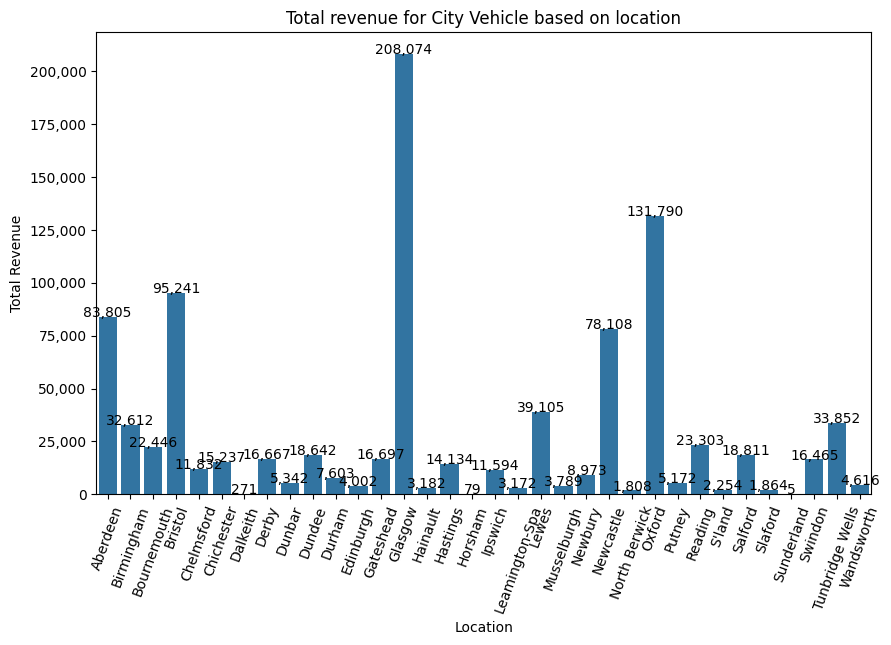

In [18]:
# Creating a bar plot - City
plt.figure(figsize=(10, 6))
df_location_vehicle_revenue_city = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'City']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_city)

# Adding title and labels
plt.title('Total revenue for City Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_city.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=70)

# Displaying the plot
plt.show()

### 5.5.3. Vehicle Type - Everyday

The bar chart illustrating `total revenue for Everyday vehicles` based on location provides detailed insights into the _financial performance of these vehicles across various locations_. **Glasgow stands out as the highest revenue-generating location** with a significant **total of £1,591,053**, _highlighting the strong demand for Everyday vehicles_ in this area and making it a strategic location for fleet expansion and focused marketing efforts. **Oxford** follows with a **total revenue of £805,299**, indicating high utilisation and making it a critical market for maintaining and possibly increasing the fleet. **Bristol** also shows robust performance, **generating £740,501**, suggesting opportunities for continued growth and investment.

Moderate revenue locations such as **Aberdeen, with £435,955, and Newcastle, with £472,817**, _demonstrate strong demand and highlight their importance in the overall revenue landscape_. **Reading, generating £193,011**, also reflects significant contributions. Other notable locations include **Bournemouth, Edinburgh, and Exeter**, which _show stable demand and potential for further growth_ with targeted marketing and strategic fleet management.

Several locations, including **Abingdon, Banbury, and Chelmsford**, contribute lower revenue figures but still add value to the overall revenue. Targeted promotional activities or service enhancements could help boost performance in these areas. _The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like **Glasgow, Oxford, and Bristol** to be focal points for resource allocation and strategic planning_. Moderate and lower-revenue locations present opportunities for growth through targeted initiatives and optimisation strategies.

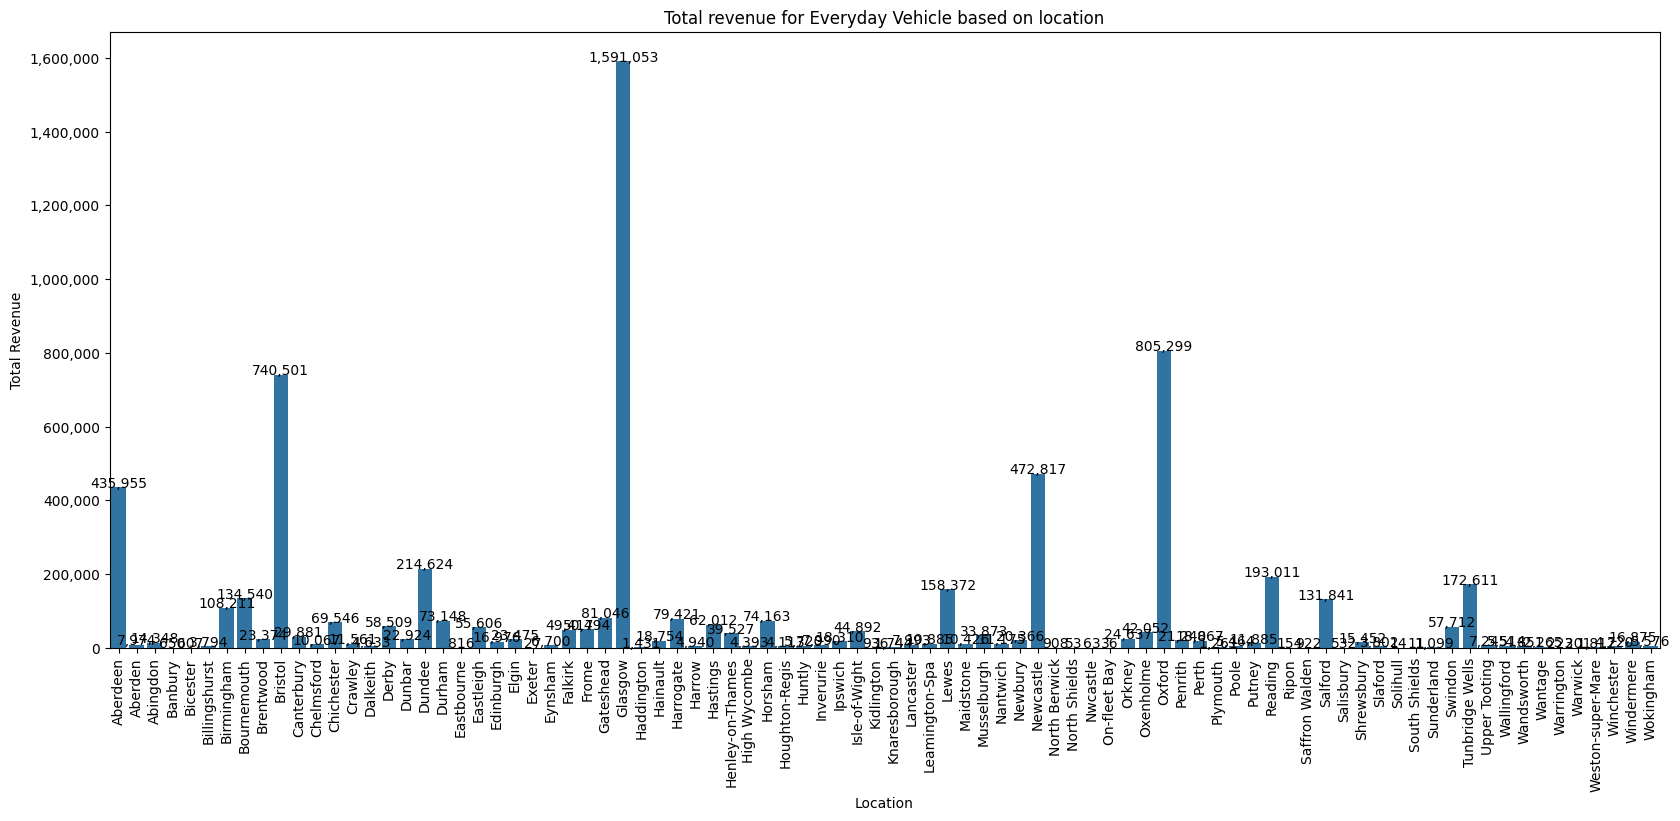

In [19]:
# Creating a bar plot - Everyday
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_everyday = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'Everyday']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_everyday)

# Adding title and labels
plt.title('Total revenue for Everyday Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_everyday.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 5.5.4. Vehicle Type - Family

The bar chart illustrating `total revenue for Family vehicles` based on location provides comprehensive insights into the performance of these vehicles across various locations. **Oxford** stands out as the highest revenue-generating location with a **total of £593,168**, highlighting the significant demand for Family vehicles in this area and suggesting it as a strategic focus for fleet expansion and targeted marketing efforts. Close behind is **Bristol, with £582,078**, also indicating high utilisation and the potential for further investment in Family vehicles in this market. **Glasgow follows with a revenue of £572,502**, making it another critical location for maintaining and enhancing the fleet.

Moderate revenue locations include **Aberdeen with £94,030**, **Birmingham with £121,439**, and **Bournemouth with £96,945**, demonstrating strong demand and positioning them as important markets for Family vehicles. **Newcastle, generating £276,794**, also reflects significant contributions and highlights its relevance in the overall revenue landscape. Other notable locations such as **Lewes (69,316 units) and Reading (63,569 units)** _show stable demand and potential for further growth_ with targeted marketing and strategic fleet management.

Several locations, including **Brentwood (£1,391), High Wycombe (£142), and Inverurie (£757)**, _contribute lower revenue figures_. While modest, these locations still add value to the overall revenue and may benefit from promotional activities or service enhancements to boost performance. The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like **Bristol, Glasgow, and Oxford** to be focal points for resource allocation and strategic planning. Moderate and lower-revenue locations present opportunities for growth through targeted initiatives and optimization strategies.

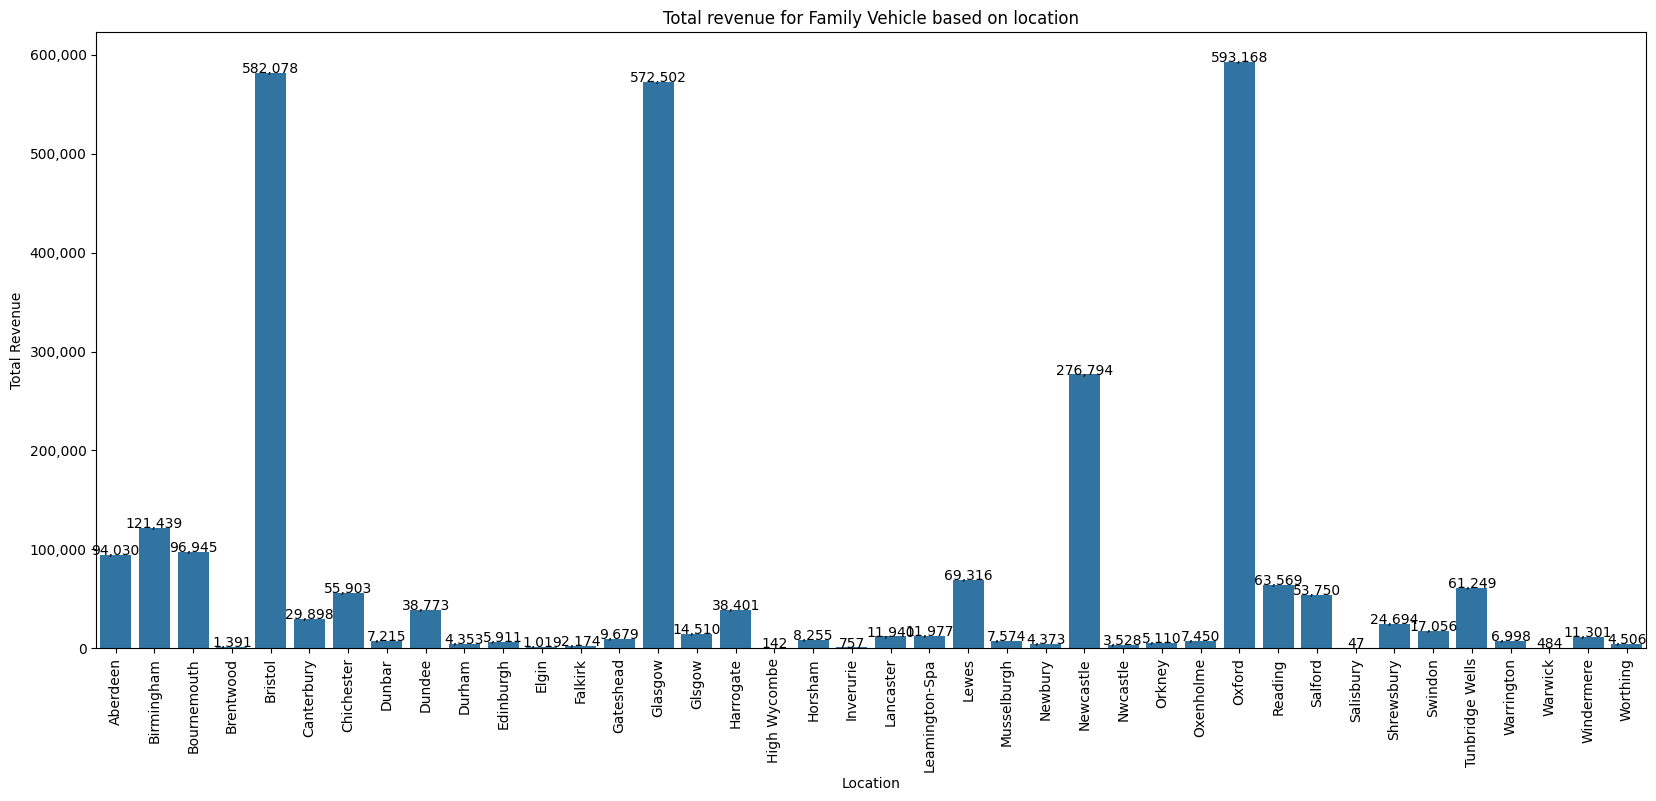

In [20]:
# Creating a bar plot - Family
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_family = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'Family']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_family)

# Adding title and labels
plt.title('Total revenue for Family Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_family.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 5.5.5. Vehicle Type - Van

The bar chart depicting `total revenue for Van vehicles` based on location provides valuable insights into the _financial performance of these vehicles across various locations_. **Glasgow emerges as the highest revenue-generating location, with a substantial total of £118,704**, indicating a strong demand for Van vehicles in this area and suggesting it as a strategic focus for fleet expansion and targeted marketing efforts. **Oxford follows with a revenue of £77,476**, highlighting significant utilisation and positioning it as another critical market for maintaining and possibly increasing the fleet of Van vehicles.

**Bristol** also shows robust performance, **generating £62,106**, which suggests opportunities for continued growth and investment in this location. **Newcastle, with a revenue of £45,007**, demonstrates moderate demand and highlights its relevance in the overall revenue landscape for Van vehicles. Other notable locations such as **Harrogate (£23,853), Dundee (£20,873), Aberdeen (£16,359), and Birmingham (£17,540)** also _reflect significant contributions, indicating stable demand and potential for further growth_ through targeted marketing and strategic fleet management.

Several locations, including **Bournemouth (£541), Coatbridge (£642), and Falkirk (£2,873)**, contribute lower revenue figures. While modest, these locations still add value to the overall revenue. They may benefit from promotional activities or service enhancements to boost performance. _The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like **Glasgow, Oxford, and Bristol** to be focal points for resource allocation and strategic planning. Moderate and lower-revenue locations present opportunities for growth through targeted initiatives and optimisation strategies._

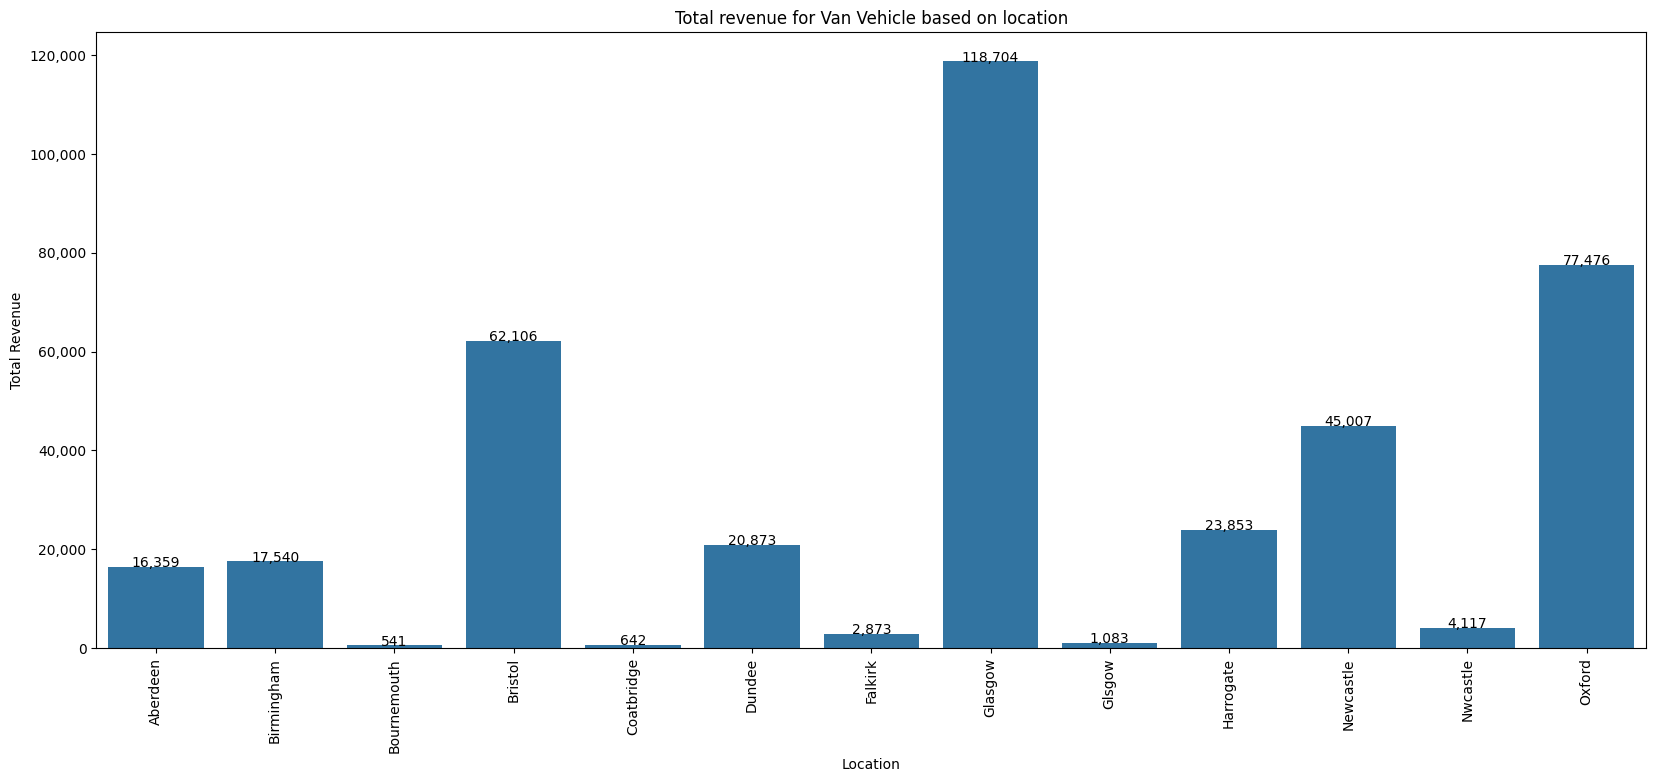

In [21]:
# Creating a bar plot - Van
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_van = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'Van']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_van)

# Adding title and labels
plt.title('Total revenue for Van Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_van.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

# 6. Analysis - Total Bookings (Demand)

## 6.1. How do overall demand compare based on vehicle type?

The bar chart illustrating `total demand per vehicle type` provides a clear overview of _how different vehicle categories are utilised_. **Everyday vehicles dominate the demand**, with a **total of 240,827 bookings**, _indicating their popularity and frequent use_. This high demand highlights the necessity for a substantial fleet of Everyday vehicles to meet customer needs effectively.

**Family vehicles follow as the second most in-demand category, with 86,078 bookings**. This significant figure underscores the importance of maintaining a well-stocked inventory of Family vehicles to cater to a substantial segment of the market.

**City vehicles, with a demand of 38,938 bookings**, rank third, _showing a moderate level of utilisation_. While not as high as Everyday or Family vehicles, the demand for City vehicles is still considerable, necessitating a balanced approach in fleet management to ensure availability.

**Vans, with a total demand of 12,171 bookings**, reflect a lower but notable level of utilisation. This indicates a specific, albeit smaller, market segment that relies on Van vehicles, suggesting the need for targeted strategies to maximize their use and profitability.

**7 Seater vehicles** have the least demand, with **only 600 bookings**. This minimal demand suggests that _7 Seaters are either less popular or have more specialised use cases_. Therefore, maintaining a smaller, yet adequate, fleet of 7 Seater vehicles would be prudent to meet this niche demand without over-allocating resources.

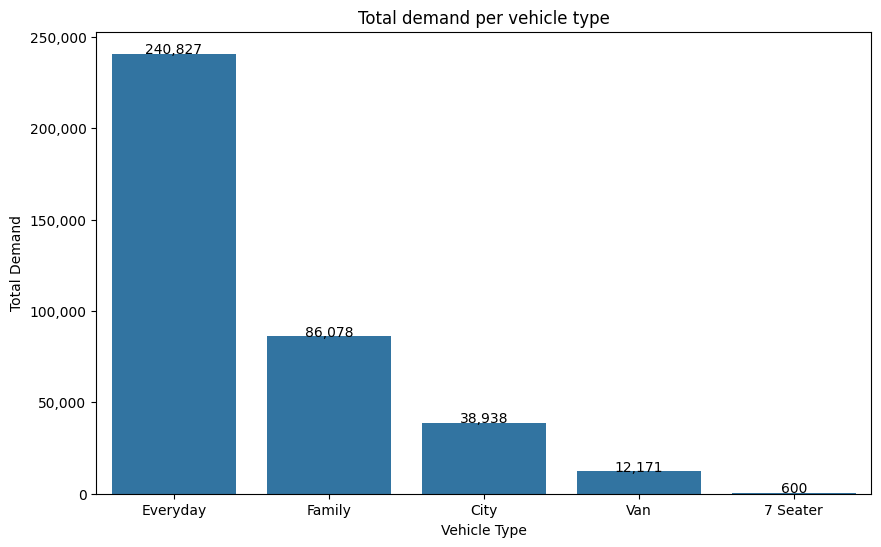

In [22]:
demand_vehicle_type = df.groupby('Vehicle Type')['booking_id'].count().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Vehicle Type', y='booking_id', data=demand_vehicle_type)

# Adding title and labels
plt.title('Total demand per vehicle type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in demand_vehicle_type.iterrows():
    barplot.text(index, row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

# Displaying the plot
plt.show()

## 6.2. How do overall demand compare based on location?

The treemap chart illustrating `total demand by location` provides a visual representation of _how demand for vehicles is distributed across various locations_. **Glasgow stands out as the highest demand location, indicated by the largest block**, _suggesting a strong market for vehicle rentals and highlighting it as a key area for resource allocation and strategic focus_.

**Oxford follows as the second highest demand location**, with a substantial block size that _reflects significant utilisation of vehicles_. This makes Oxford another critical market for ensuring a sufficient supply of vehicles to meet customer needs. **Bristol also shows considerable demand**, _placing it among the top locations and underscoring the need for targeted marketing and fleet management in this area._

Other notable locations with high demand include **Aberdeen, Lewes, Bournemouth, Birmingham, and Salford**. These areas have relatively large blocks, indicating strong demand and the importance of maintaining an adequate fleet to serve these markets effectively. Locations such as **Newcastle, Dundee, Reading, and Tunbridge Wells** also exhibit significant demand, _highlighting them as important markets that contribute to the overall demand landscape._

The chart also shows a multitude of smaller blocks representing various other locations such as **Chichester, Horsham, Swindon, Eastleigh, Derby, and many more**. While _these locations may have lower individual demand, they collectively contribute to a considerable portion of the total demand_, emphasizing the need for a broad and balanced distribution of resources across multiple locations to capture market opportunities.

In [23]:
demand_location = df.groupby('location')['booking_id'].count().sort_values(ascending=False).to_frame()

# Create a column location from index
demand_location['location'] = demand_location.index

# Creating a bar plot
plt.figure(figsize=(10, 6))
# Create a treemap
fig = px.treemap(demand_location, path=['location'], values='booking_id', title='Total Demand by Location')

# Show the treemap
fig.show()

<Figure size 1000x600 with 0 Axes>

## 6.3. How do overall demand compare based on season?

The bar chart illustrating `total demand per season provides a clear view of how vehicle demand varies throughout the year`. **Spring emerges as the season with the highest demand, totaling 128,103 bookings**. This peak demand indicates that _Spring is a crucial period for vehicle rentals_, necessitating an ample supply and strategic marketing efforts to meet customer needs effectively.

**Autumn follows as the second-highest demand season, with a total of 95,151 bookings**. This significant demand suggests a strong market presence during Autumn, highlighting the importance of maintaining an adequate fleet and robust marketing strategies to capitalise on this period.

**Summer is close behind Autumn**, with a **total demand of 93,616 bookings**. The high demand during Summer reflects the season's importance in the rental market, emphasizing the need for efficient resource allocation and promotional activities to maximise revenue.

**Winter has the lowest demand among the seasons**, with a **total of 61,744 bookings**. Although Winter shows the least demand, it still represents a _considerable market segment_. _**Strategies to boost Winter rentals could include special offers, discounts, and tailored services to attract more customers during this slower period.**_

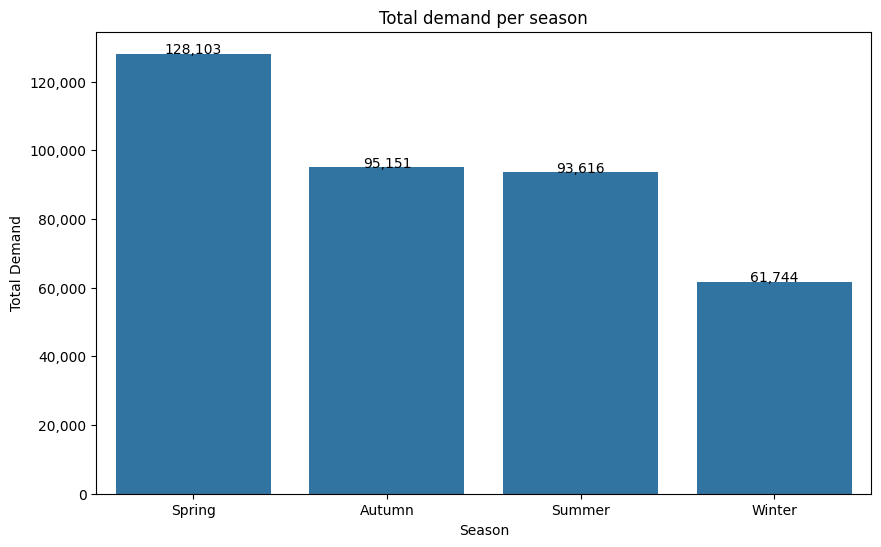

In [24]:
seasonal_demand = df.groupby('season')['booking_id'].count().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='season', y='booking_id', data=seasonal_demand)

# Adding title and labels
plt.title('Total demand per season')
plt.xlabel('Season')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in seasonal_demand.iterrows():
    barplot.text(index, row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

# Displaying the plot
plt.show()

## 6.4. How do overall demand compare based on yearly season?

The bar chart illustrating `total demand per season from 2018 to 2024` provides a detailed view of _**how vehicle demand has evolved over these years**_. The stacked bars represent the _total demand for each season_, **_highlighting variations and trends in vehicle rental patterns._**

**2018-2019**: The initial years show relatively low demand, with **2018 having the least total demand across all seasons**. _In 2019, there is a noticeable increase_, particularly in **Spring (13,708 bookings) and Summer (10,388 bookings)**, _indicating a gradual growth in market demand._

**2020**: This year marks a significant rise in demand across all seasons. **Autumn (17,005 bookings) and Summer (14,586 bookings)** see substantial increases, _reflecting a robust growth phase. Spring and Winter also contribute notably, indicating a balanced demand throughout the year._

**2021**: Demand continues to grow, with **Spring (27,601 bookings) and Summer (24,076 bookings) leading the way**. **Autumn (23,974 bookings) and Winter (8,876 bookings)** also show strong performance, _highlighting a peak period for vehicle rentals._

**2022-2023**: These years exhibit sustained high demand, with **Spring maintaining its lead**. **In 2022, Spring demand reaches 30,345 bookings**, while **Autumn and Summer also show significant figures at 21,715 bookings and 22,442 bookings**, respectively. **In 2023, Spring remains strong at 29,116 bookings, with Autumn (21,513 bookings) and Summer (22,119 bookings)** continuing to perform well. _Winter demand remains stable, reflecting a consistent market throughout the year._

**2024**: The partial data for 2024 indicates a strong start, particularly for **Spring (16,791 bookings) and Winter (12,889 bookings)**. _While the data for the other seasons is not yet complete, the early figures suggest continued high demand, especially in the early part of the year._


<Figure size 2000x2000 with 0 Axes>

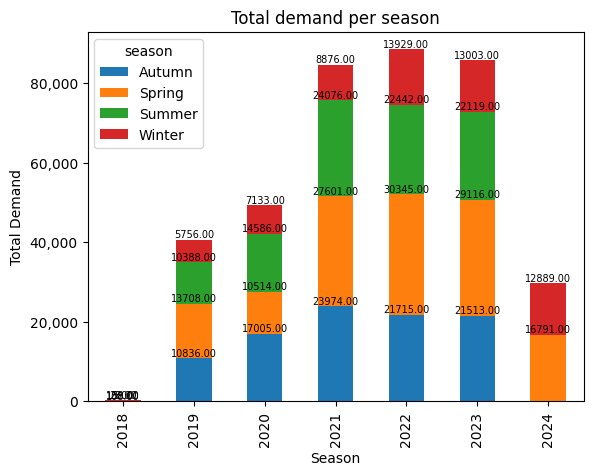

In [25]:
dff = df.copy()

# Convert 'booking_created_at_year' to string if it's numeric for better grouping
dff['booking_created_at_year'] = dff['booking_created_at_year'].astype(str)

yearly_seasonal_demand = dff.groupby(['booking_created_at_year', 'season'])['booking_id'].count().unstack()

# Creating a bar plot
plt.figure(figsize=(20, 20))
barplot = yearly_seasonal_demand.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Total demand per season')
plt.xlabel('Season')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Loop through each patch (a rectangle in the bar chart)
for bar in barplot.patches:
    # Get the appropriate location to place the text
    # In this case, x is the horizontal center of the bar, and y is the height of the bar
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    bar_y = bar.get_y() + bar_height

    # Only add text annotations if there is enough space (height)
    if bar_height > 0:
        plt.text(bar_x, bar_y, f'{bar_height:.2f}',
                 ha='center', va='bottom', color='black', rotation=0, fontsize=7)

# Displaying the plot
plt.show()

## 6.5. How do overall demand compare based on both location and vehicle type?

In [26]:
location_vehicle_demand = df.groupby(['Vehicle Type', 'location'])['booking_id'].count()
df_location_vehicle_demand = pd.DataFrame(location_vehicle_demand)
df_location_vehicle_demand.reset_index(inplace=True)

### 6.5.1. Vehicle Type - 7 Seater

The bar chart shows the `total demand for 7 Seater vehicles by location`. **Gateshead has the highest demand with 287 bookings**, indicating a strong preference for this vehicle type. **Oxford follows with 159 bookings**, and **Aberdeen has 154 bookings**. _These insights are crucial for fleet management, highlighting the need to focus resources on **Gateshead, Oxford, and Aberdeen** to meet customer demand and optimise revenue._

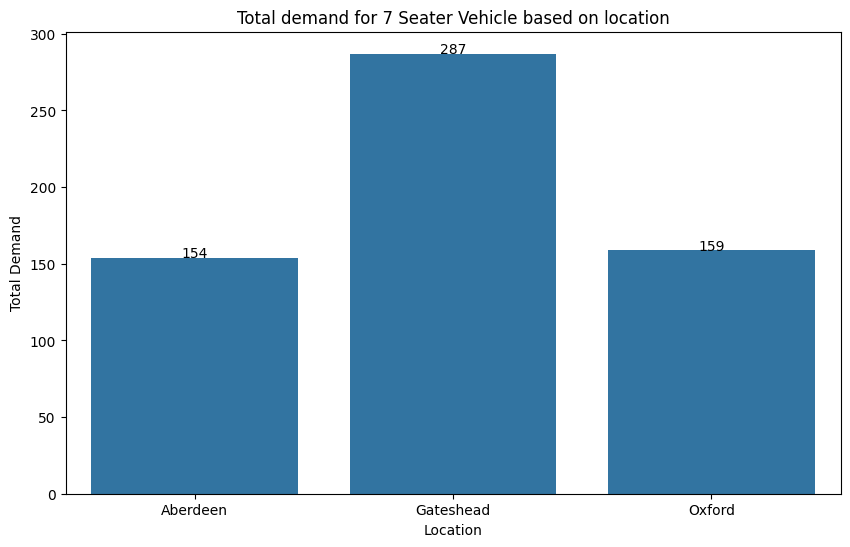

In [27]:
# Creating a bar plot - 7 Seater
plt.figure(figsize=(10, 6))
df_location_vehicle_demand_7_seater = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == '7 Seater']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_7_seater)

# Adding title and labels
plt.title('Total demand for 7 Seater Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_7_seater.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

# Displaying the plot
plt.show()

### 6.5.2. Vehicle Type - City

The bar chart illustrating `total demand for City vehicles by location` highlights key areas of high utilisation. **Glasgow leads with the highest demand at 9,007 bookings**, establishing it as a crucial market requiring significant resource allocation. **Oxford follows with 4,672 bookings**, indicating strong utilisation and the need for a robust fleet. **Aberdeen also shows substantial demand with 4,323 bookings**, underscoring its importance in the market.

Moderate demand is seen in **Bristol (3,564 bookings) and Newcastle (3,051 bookings)**, _both demonstrating strong market presence_. **Lewes (1,876 bookings), Reading (1,055 bookings), and Ipswich (795 bookings) reflect steady utilisation of City vehicles.**

Lower demand locations, such as **Birmingham (1,126 bookings), Bournemouth (945 bookings), Dundee (905 bookings), and Tunbridge Wells (1,372 bookings)**, _represent stable markets that could benefit from targeted marketing to boost utilisation_. _Minimal demand is observed in **Chichester (643 bookings), Salford (622 bookings), and Swindon (739 bookings)**, which still contribute to the overall demand landscape._

These insights are crucial for strategic planning in fleet management, ensuring alignment of City vehicle supply with demand in high-demand areas, while also exploring growth opportunities in moderate and lower-demand locations.

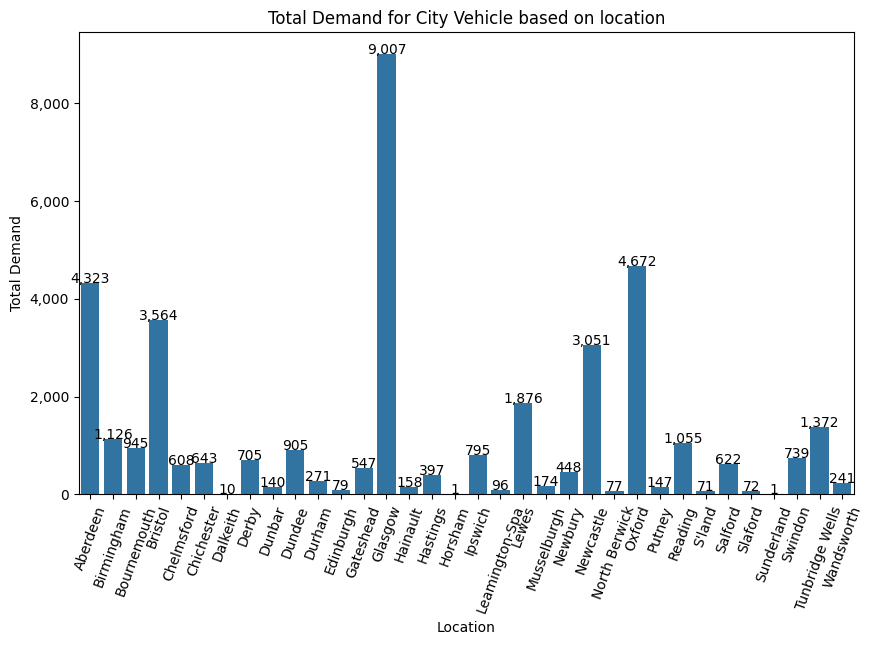

In [28]:
# Creating a bar plot - City
plt.figure(figsize=(10, 6))
df_location_vehicle_demand_city = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'City']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_city)

# Adding title and labels
plt.title('Total Demand for City Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_city.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=70)

# Displaying the plot
plt.show()

### 6.5.3. Vehicle Type - Everyday

The bar chart illustrates `total demand for Everyday vehicles based on location`, _revealing significant variations across different regions_. **Glasgow stands out with the highest demand at 65,603 bookings**, making it the primary market for Everyday vehicles. **Oxford follows with 26,828 bookings**, indicating substantial utilisation. **Aberdeen and Bristol also show considerable demand, with 20,604 bookings and 24,741 bookings**, respectively. Moderate demand is observed in locations like **Newcastle (16,471 bookings) and Dundee (8,295 bookings)**. In contrast, many other locations, such as **Exeter, Leamington Spa, and more, exhibit lower demand, generally below 3,000 bookings**.

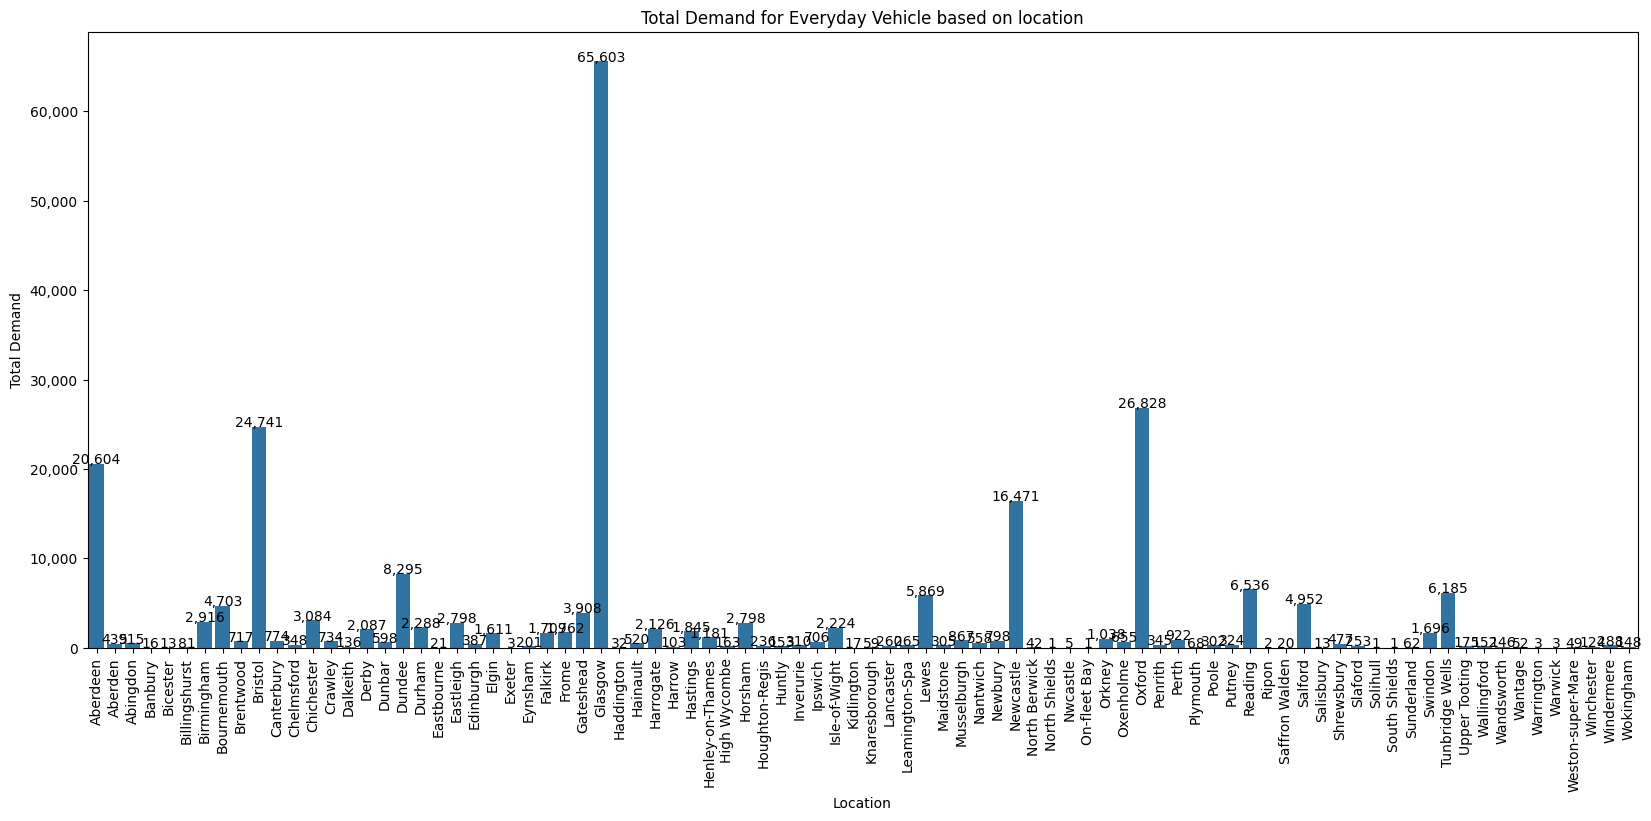

In [29]:
# Creating a bar plot - Everyday
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_everyday = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'Everyday']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_everyday)

# Adding title and labels
plt.title('Total Demand for Everyday Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_everyday.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 6.5.4. Vehicle Type - Family

The bar chart illustrates the `total demand for Family vehicles based on location`, highlighting significant differences across regions. **Glasgow and Bristol lead with the highest demand, totaling 17,844 and 16,618 bookings**, respectively, indicating these as key markets for Family vehicles. **Oxford also shows high demand at 15,805 bookings**, making it another critical area for resource allocation.

**Newcastle (8,097 bookings) and Birmingham (3,659 bookings)** _demonstrate moderate demand, requiring adequate fleet management to meet customer needs._ Other locations, such as **Aberdeen (2,751 bookings), Reading (2,552 bookings), and Bournemouth (2,836 bookings)**, _reflect lower but still significant demand, suggesting opportunities for growth through targeted marketing._

Smaller locations like **Dunbar, Dundee, and Chichester exhibit minimal demand**, generally **below 2,000 bookings**, highlighting areas where strategic initiatives could enhance utilisation.

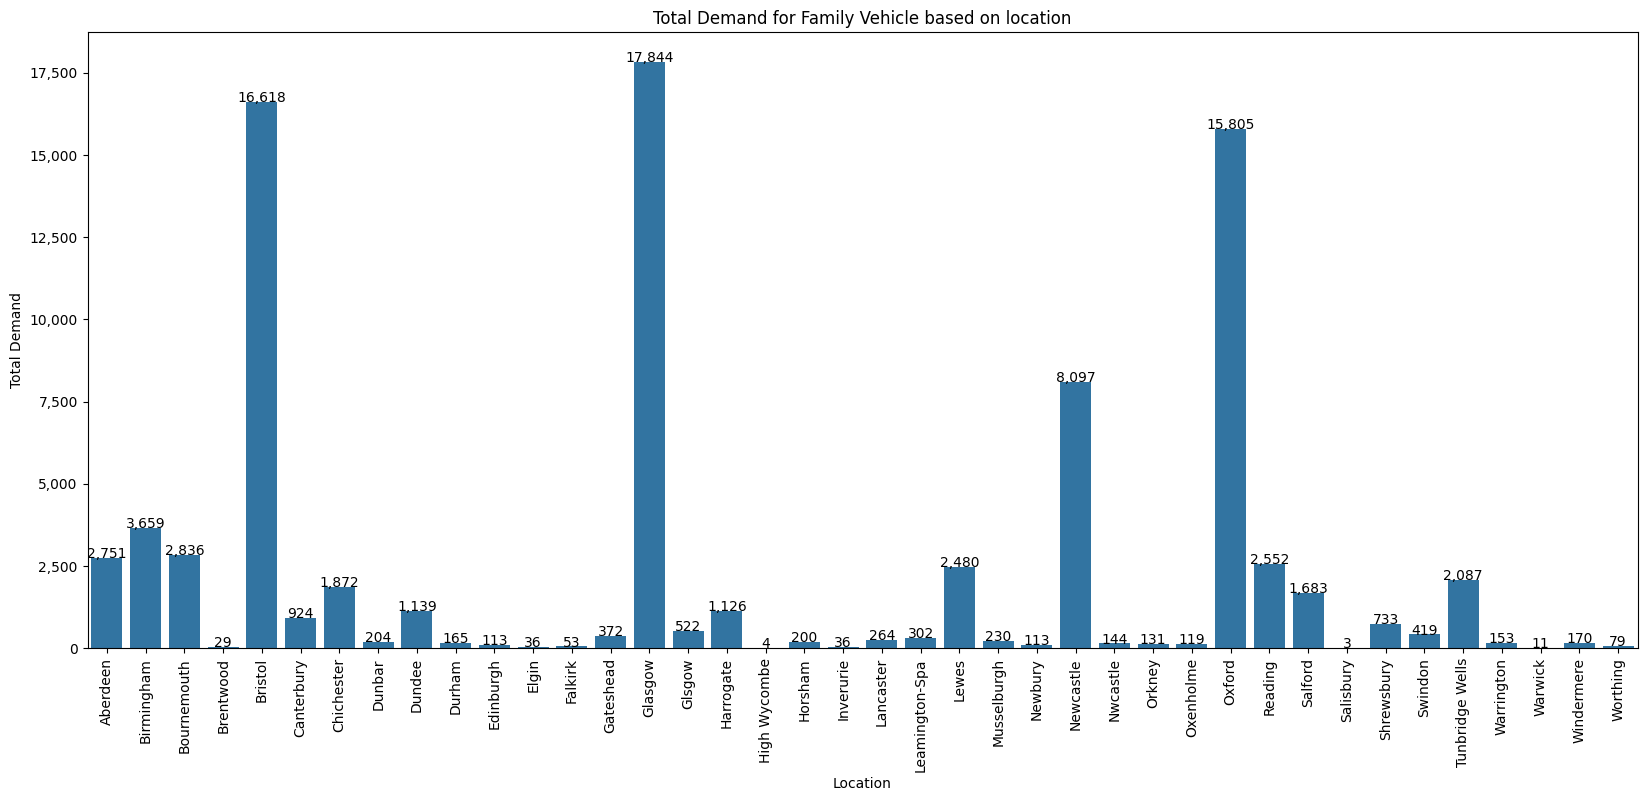

In [30]:
# Creating a bar plot - Family
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_family = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'Family']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_family)

# Adding title and labels
plt.title('Total Demand for Family Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_family.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 6.5.5. Vehicle Type - Van

The bar chart illustrates the `total demand for Van vehicles based on location`, highlighting significant demand variations across different regions. **Glasgow stands out with the highest demand, totaling 4,260 bookings**, indicating it as a key market for Van vehicles. **Oxford follows with a significant demand of 2,101 bookings**, _showing substantial utilisation in this area._

Other notable locations include **Bristol (1,740 bookings), Newcastle (1,386 bookings), and Dundee (758 bookings)**, all _demonstrating moderate demand for Van vehicles_. **Harrogate also shows relevant demand with 705 bookings.**

Locations such as **Aberdeen (443 bookings), Birmingham (455 bookings), and Coatbridge (23 bookings)** _exhibit lower demand_, suggesting these areas could benefit from targeted marketing efforts to boost utilisation.

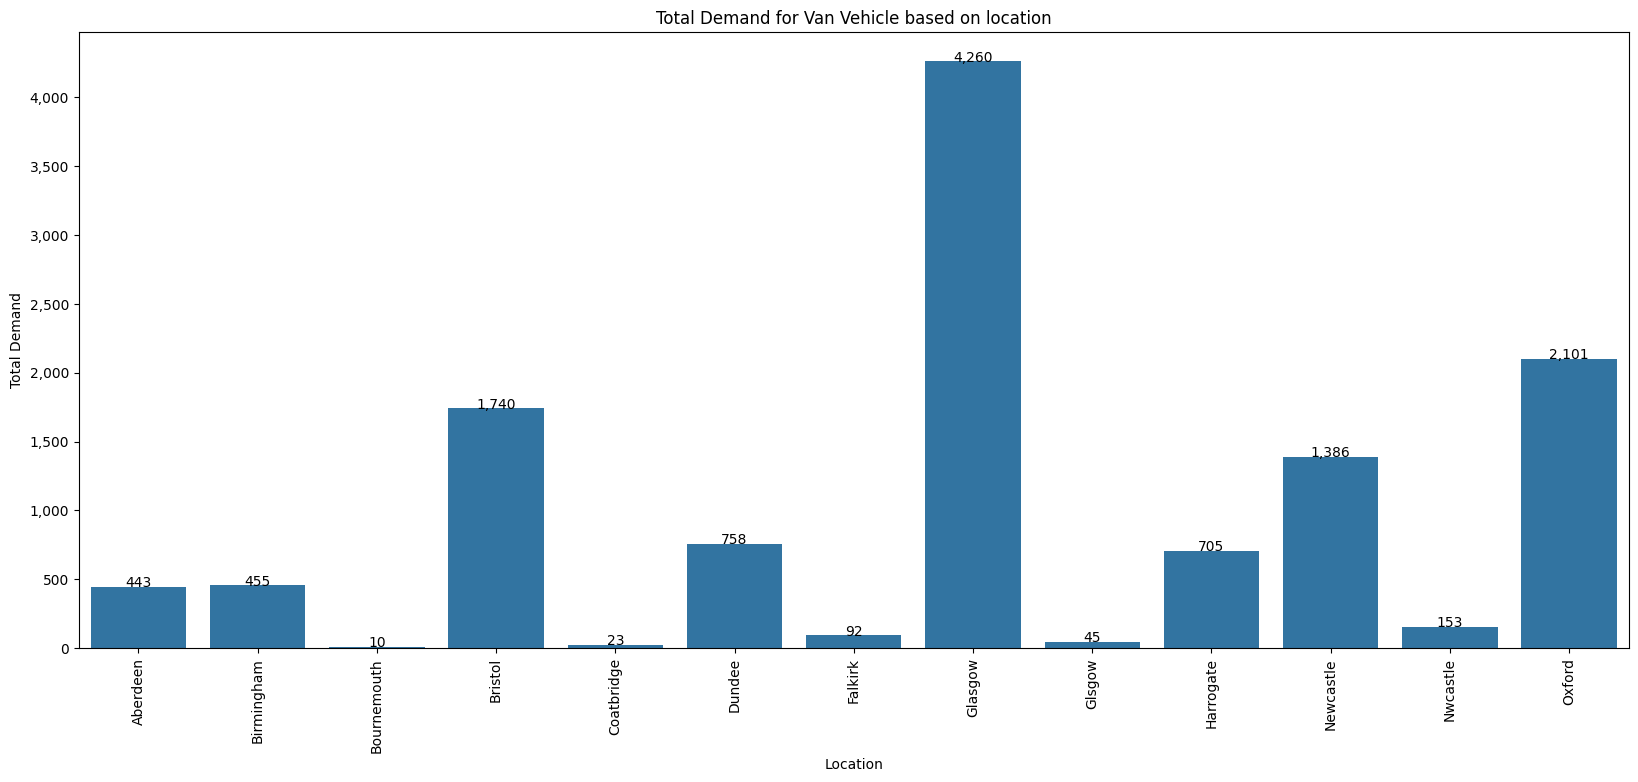

In [31]:
# Creating a bar plot - Van
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_van = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'Van']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_van)

# Adding title and labels
plt.title('Total Demand for Van Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_van.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

# 7. Analyse - How far user booked their rides before using it?

In [32]:
dff = df.copy()

# convert to datetime
dff['booking_created_at'] = pd.to_datetime(dff['booking_created_at'])
dff['booking_actual_start'] = pd.to_datetime(dff['booking_actual_start'])

# check how far users booked their rides before using it - booking_created_at - booking_actual_start
dff['booking_lead_time'] =  dff['booking_actual_start'] - dff['booking_created_at']
dff['booking_lead_time'] = dff['booking_lead_time'].dt.total_seconds()
dff['booking_lead_time'] = dff['booking_lead_time']/60
dff.head()

,vehicle_description,vehicle_registration,location,booking_id,booking_actual_start,booking_actual_end,booking_actual_duration,booking_billed_start,booking_billed_start_hour,booking_billed_start_dayofweek,booking_billed_start_month,booking_billed_start_year,booking_billed_end,booking_billed_end_hour,booking_billed_end_dayofweek,booking_billed_end_month,booking_billed_end_year,booking_billed_duration,booking_mileage,booking_rates_hours,booking_rates_24hours,booking_rates_overnight,booking_actual_cost_distance,booking_actual_cost_time,booking_actual_cost_total,booking_created_at,booking_created_at_hour,booking_created_at_dayofweek,booking_created_at_month,booking_created_at_year,season,is_holiday,Vehicle Type,Fuel Type,hourly_rate,daily_rate,per_mile,booking_lead_time
0,RETIRED - White Toyota Aygo X-Play Nav (NL66 NKZ),NL66 NKZ,Bristol,fc59ba9c-2ce9-11ea-8efc-bfa292f04054,2020-01-01 23:06:00,2020-01-02 01:24:00,138.0,2020-01-01 23:00:00,23,2,1,2020,2020-01-02 08:00:00,8,3,1,2020,540.0,82.0,0.0,0.0,1.0,14.76,9.50,24.26,2020-01-01 22:56:00,22,2,1,2020,Winter,1,City,Petrol,4.75,33.25,0.18,10.0
1,RETIRED - Renault Zoe EV (DL68 LNK),DL68 LNK,Bristol,1cf7fae6-2ce7-11ea-a970-fbf7b3786523,2020-01-01 22:46:00,2020-01-02 02:01:00,195.0,2020-01-01 22:45:00,22,2,1,2020,2020-01-02 02:30:00,2,3,1,2020,225.0,5.0,0.0,0.0,1.0,0.00,11.00,11.00,2020-01-01 22:36:00,22,2,1,2020,Winter,1,Everyday,EV,5.50,38.50,0.18,10.0
2,White Toyota Yaris Petrol Hybrid (Automatic) -...,ND19 HWY,Newbury,591b7a98-2cd8-11ea-a341-71665a42c0e8,2020-01-01 21:29:00,2020-01-01 23:28:00,119.0,2020-01-01 21:30:00,21,2,1,2020,2020-01-01 23:30:00,23,2,1,2020,120.0,6.0,2.0,0.0,0.0,1.08,11.00,12.08,2020-01-01 20:50:00,20,2,1,2020,Winter,1,Everyday,Petrol,5.50,38.50,0.18,39.0
3,RETIRED - White Toyota Aygo X-Play (NL68 JVP),NL68 JVP,Swindon,b6177928-2c55-11ea-a2e0-e9685b57c653,2020-01-01 21:22:00,2020-01-01 21:38:00,16.0,2020-01-01 21:15:00,21,2,1,2020,2020-01-01 21:45:00,21,2,1,2020,30.0,6.0,0.5,0.0,0.0,1.08,2.38,3.46,2020-01-01 05:15:00,5,2,1,2020,Winter,1,City,Petrol,4.75,33.25,0.18,967.0
4,RETIRED - White Toyota Yaris Hybrid NJ68 JHV A...,NJ68 JHV,Horsham,9ffdc790-27ba-11ea-a36d-c540c1997f03,2020-01-01 22:02:00,2020-01-02 19:50:00,733.0,2020-01-01 20:30:00,20,2,1,2020,2020-01-02 20:30:00,20,3,1,2020,915.0,53.0,0.0,1.0,0.0,9.54,38.50,48.04,2019-12-26 08:35:00,8,3,12,2019,Winter,1,Everyday,Petrol,5.50,38.50,0.18,9447.0


In [33]:
dff['booking_lead_time'].describe()

count    378614.000000
mean       5186.907333
std       16657.207293
min     -508570.000000
25%          37.000000
50%         652.000000
75%        3632.000000
max      777187.000000
Name: booking_lead_time, dtype: float64

In [34]:
dff[dff['booking_lead_time'] < 0].count()

vehicle_description               157
vehicle_registration              157
location                          157
booking_id                        157
booking_actual_start              157
booking_actual_end                157
booking_actual_duration           157
booking_billed_start              157
booking_billed_start_hour         157
booking_billed_start_dayofweek    157
booking_billed_start_month        157
booking_billed_start_year         157
booking_billed_end                157
booking_billed_end_hour           157
booking_billed_end_dayofweek      157
booking_billed_end_month          157
booking_billed_end_year           157
booking_billed_duration           157
booking_mileage                   157
booking_rates_hours               157
booking_rates_24hours             157
booking_rates_overnight           157
booking_actual_cost_distance      157
booking_actual_cost_time          157
booking_actual_cost_total         157
booking_created_at                157
booking_crea

In [38]:
# Condition to filter rows where 'booking_lead_time' is less than -500
condition = dff['booking_lead_time'] <= -500

# Drop rows that meet the condition
indexes_to_drop = dff[condition].index
dff.drop(indexes_to_drop, inplace=True)

# Reset index if needed
dff.reset_index(drop=True, inplace=True)

In [45]:
# Define the condition for updating the column
condition = (dff['booking_lead_time'] > -500) & (dff['booking_lead_time'] < 0)

# Update the column values based on the condition
dff.loc[condition, 'booking_lead_time'] = 0

In [47]:
dff[dff['booking_lead_time'] < 0].count()

vehicle_description               0
vehicle_registration              0
location                          0
booking_id                        0
booking_actual_start              0
booking_actual_end                0
booking_actual_duration           0
booking_billed_start              0
booking_billed_start_hour         0
booking_billed_start_dayofweek    0
booking_billed_start_month        0
booking_billed_start_year         0
booking_billed_end                0
booking_billed_end_hour           0
booking_billed_end_dayofweek      0
booking_billed_end_month          0
booking_billed_end_year           0
booking_billed_duration           0
booking_mileage                   0
booking_rates_hours               0
booking_rates_24hours             0
booking_rates_overnight           0
booking_actual_cost_distance      0
booking_actual_cost_time          0
booking_actual_cost_total         0
booking_created_at                0
booking_created_at_hour           0
booking_created_at_dayofweek

## 7.1. Correlation Analysis

## 7.1.1. Are shorter or longer bookings planned further in advance?



From the plot, a few observations can be made:

1. **Dense Region Near Origin**: There is a dense cluster of points near the origin, indicating a `large number of bookings with both short lead times and short durations.`

2. **Wide Spread**: There is a significant spread in both directions, with lead times ranging up to 800,000 hours and durations up to 750 minutes. This wide spread suggests that while `most bookings are made with shorter lead times and for shorter durations`.

3. **Pattern**: There is a discernible pattern where longer booking durations generally correspond to longer lead times, but `this pattern is not very strong`, as `correlation coefficient is only around 0.224`.

To summarize:
- There is a weak positive correlation between `booking_lead_time` and `booking_actual_duration`.
- Most bookings have `shorter lead times and durations`.

In [61]:
# Calculate correlation
correlation = dff["booking_lead_time"].corr(dff["booking_actual_duration"])
print('Correlation between booking_lead_time and booking_actual_duration', np.round(correlation, 3))

Correlation between booking_lead_time and booking_actual_duration 0.224


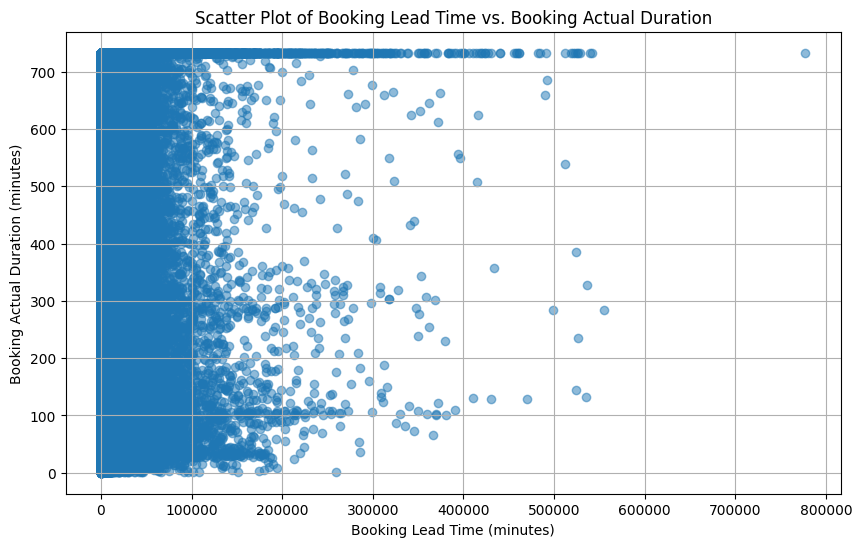

In [62]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dff["booking_lead_time"], dff["booking_actual_duration"], alpha=0.5)
plt.title("Scatter Plot of Booking Lead Time vs. Booking Actual Duration")
plt.xlabel("Booking Lead Time (minutes)")
plt.ylabel("Booking Actual Duration (minutes)")
plt.grid(True)
plt.show()

## 7.1.2. Is there a correlation between the total cost and the lead time?

Bookings made very far in advance (higher lead times) don't consistently correspond to higher or lower costs. Hence the `correlation coefficient (around 0.245)` is the same as for previous.

In [66]:
# Calculate correlation
correlation_cost_lead_time = dff["booking_actual_cost_total"].corr(dff["booking_lead_time"])

print('Correlation between booking_lead_time and booking_actual_cost_total: ', np.round(correlation_cost_lead_time, 3))

Correlation between booking_lead_time and booking_actual_cost_total:  0.245


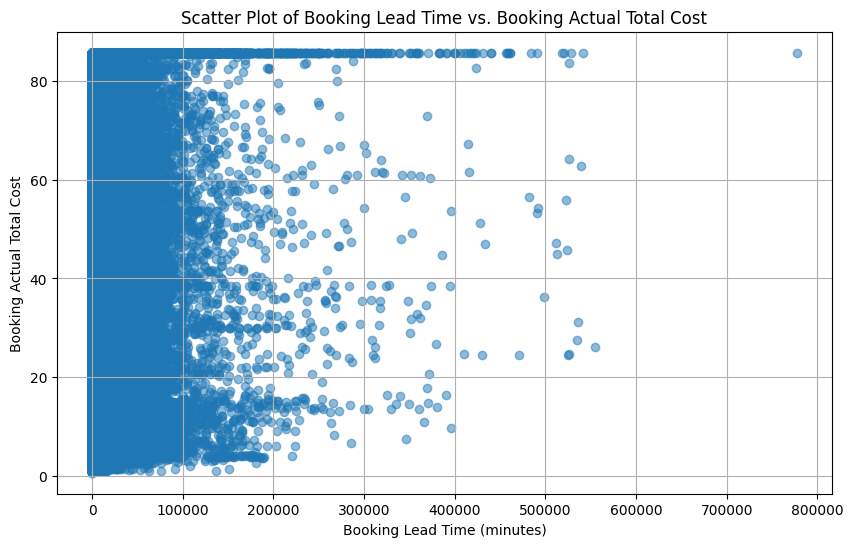

In [68]:
# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dff["booking_lead_time"], dff["booking_actual_cost_total"], alpha=0.5)
plt.title("Scatter Plot of Booking Lead Time vs. Booking Actual Total Cost")
plt.xlabel("Booking Lead Time (minutes)")
plt.ylabel("Booking Actual Total Cost")
plt.grid(True)
plt.show()

---